In [3]:
# Instale as bibliotecas necessárias
!pip install numpy scipy matplotlib


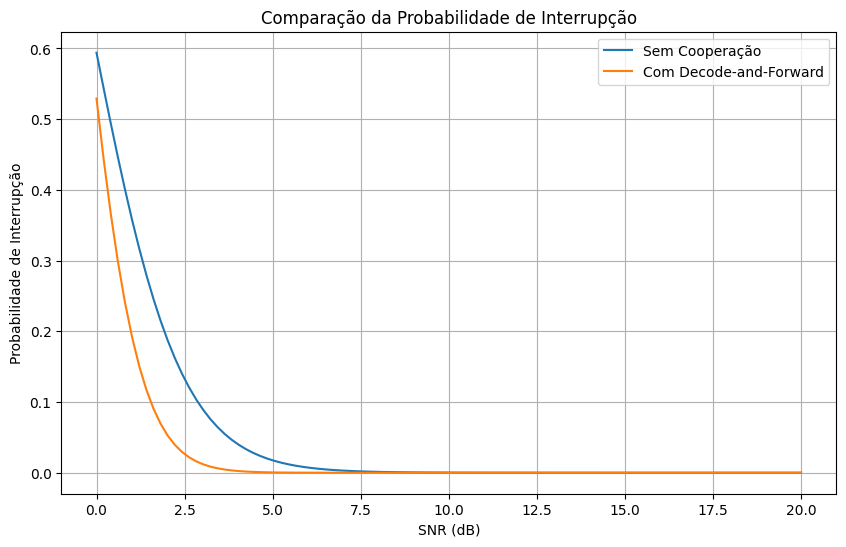

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parâmetros
m = 2  # Parâmetro Nakagami-m
snr_values = np.linspace(0, 20, 100)  # Valores de SNR (em dB)
r = 1  # Taxa de informação

# Função para converter SNR em escala linear
def snr_linear(snr_db):
    return 10 ** (snr_db / 10)

# Probabilidade de interrupção para a camada física com desvanecimento Nakagami-m
def outage_probability(snr_linear):
    threshold = 2 ** r - 1
    return stats.nakagami.cdf(threshold / snr_linear, m)

# Calcular a probabilidade de interrupção sem cooperação
outage_no_cooperation = [outage_probability(snr_linear(snr)) for snr in snr_values]

# Calcular a probabilidade de interrupção com o protocolo DF (fator 1.5 * Po, PL^2)
outage_with_df = [1.5 * (p ** 2) for p in outage_no_cooperation]

# Plotar as probabilidades de interrupção
plt.figure(figsize=(10, 6))
plt.plot(snr_values, outage_no_cooperation, label='Sem Cooperação')
plt.plot(snr_values, outage_with_df, label='Com Decode-and-Forward')
plt.xlabel('SNR (dB)')
plt.ylabel('Probabilidade de Interrupção')
plt.title('Comparação da Probabilidade de Interrupção')
plt.grid(True)
plt.legend()
plt.show()


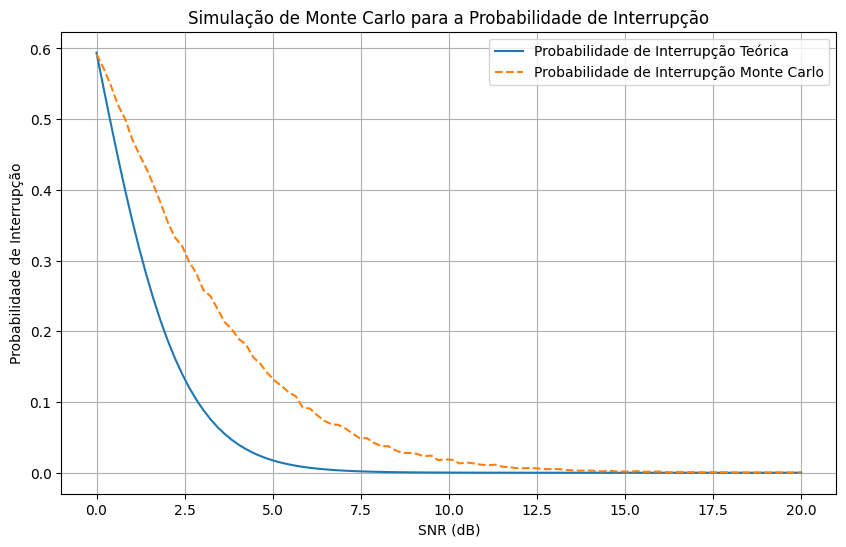

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 2  # Parâmetro Nakagami-m
snr_db_values = np.linspace(0, 20, 100)  # Valores de SNR em dB
snr_linear_values = 10 ** (snr_db_values / 10)  # Converter SNR para escala linear
threshold = 2 ** 1 - 1  # Threshold para interrupção (r = 1)
num_simulations = 10000  # Número de simulações de Monte Carlo

# Função para calcular a probabilidade de interrupção teórica
def theoretical_outage_probability(snr_linear):
    return stats.nakagami.cdf(threshold / snr_linear, m)

# Função para simular a interrupção usando Monte Carlo
def monte_carlo_outage_probability(snr_linear, num_simulations):
    # Gerar amostras aleatórias para a variável Nakagami-m
    samples = stats.nakagami.rvs(m, size=num_simulations)
    # Calcular a intensidade do canal |h|^2
    channel_power = samples ** 2
    # Contar quantas vezes a potência do canal é menor que o threshold
    num_outages = np.sum(channel_power < threshold / snr_linear)
    # Calcular a probabilidade de interrupção
    return num_outages / num_simulations

# Calcular a probabilidade de interrupção teórica para cada valor de SNR
theoretical_outages = [theoretical_outage_probability(snr_linear) for snr_linear in snr_linear_values]

# Calcular a probabilidade de interrupção usando Monte Carlo para cada valor de SNR
monte_carlo_outages = [monte_carlo_outage_probability(snr_linear, num_simulations) for snr_linear in snr_linear_values]

# Plotar os resultados
plt.figure(figsize=(10, 6))
plt.plot(snr_db_values, theoretical_outages, label='Probabilidade de Interrupção Teórica')
plt.plot(snr_db_values, monte_carlo_outages, label='Probabilidade de Interrupção Monte Carlo', linestyle='--')
plt.xlabel('SNR (dB)')
plt.ylabel('Probabilidade de Interrupção')
plt.title('Simulação de Monte Carlo para a Probabilidade de Interrupção')
plt.grid(True)
plt.legend()
plt.show()
